In [30]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [31]:
model_path = Path("/workspace/yolov11bee/experiments/0801-customv1/01freeze4/weights/best.pt")
model = YOLO(str(model_path))

In [32]:
conf_thres = 0.3

In [33]:
# ========= 1. 推理并可视化 =========
def infer_one(img_path):
    """
    对单张图片推理并可视化。
    参数:
        img_path: str | Path，图片路径
    """
    img_path = Path(img_path)
    assert img_path.exists(), f"图片不存在: {img_path}"

    # 推理
    results = model.predict(source=str(img_path), conf=conf_thres, save=False)

    # 读取原图
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 画框
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
            conf = float(box.conf.cpu().numpy())
            cls_id = int(box.cls.cpu().numpy())
            label = f"{model.names[cls_id]} {conf:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label, (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # 显示
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(img)
    plt.show()


image 1/1 /workspace/yolov11bee/experiments/inference/sample-images/BEE24-16_000180.jpg: 512x800 (no detections), 13.3ms
Speed: 2.8ms preprocess, 13.3ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 800)


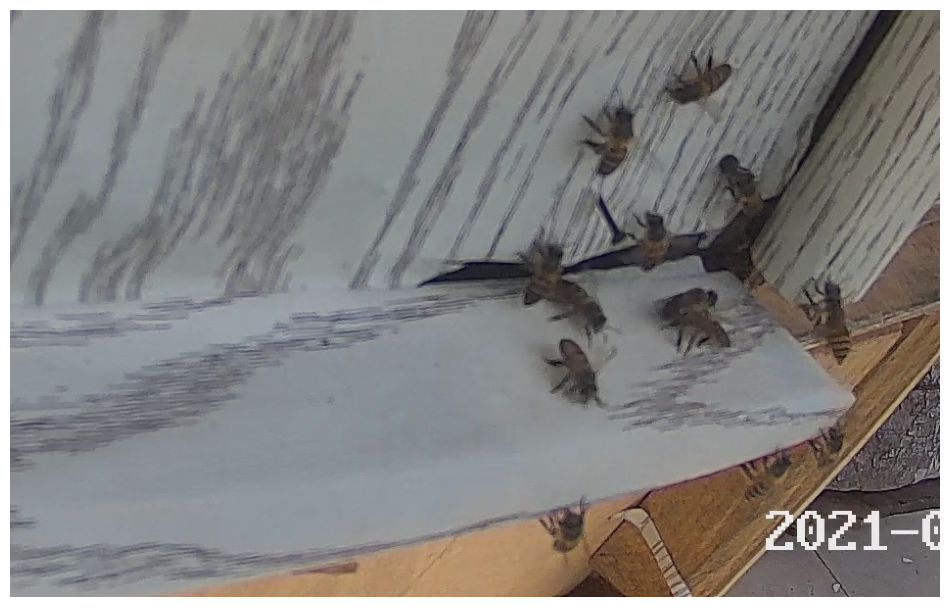

In [34]:
infer_one("/workspace/yolov11bee/experiments/inference/sample-images/BEE24-16_000180.jpg")


image 1/1 /workspace/yolov11bee/experiments/inference/sample-images/BEE24-34_000278.jpg: 416x800 9 items, 12.4ms
Speed: 2.3ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 800)


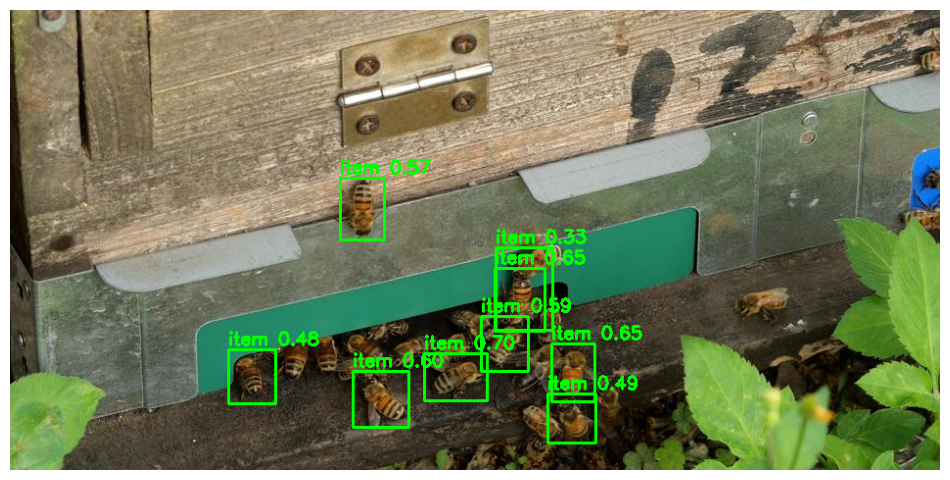

In [35]:
infer_one("/workspace/yolov11bee/experiments/inference/sample-images/BEE24-34_000278.jpg")


image 1/1 /workspace/yolov11bee/experiments/inference/sample-images/BEE24-36_000703.jpg: 480x800 8 items, 20.0ms
Speed: 3.6ms preprocess, 20.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


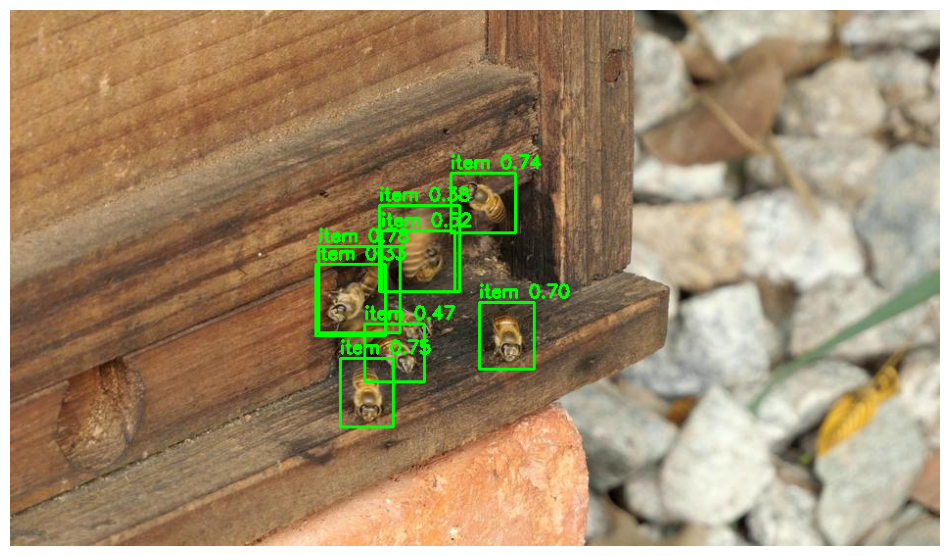

In [36]:
infer_one("/workspace/yolov11bee/experiments/inference/sample-images/BEE24-36_000703.jpg")


image 1/1 /workspace/yolov11bee/experiments/inference/sample-images/custom-56-003032.jpg: 480x800 2 items, 13.1ms
Speed: 2.8ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


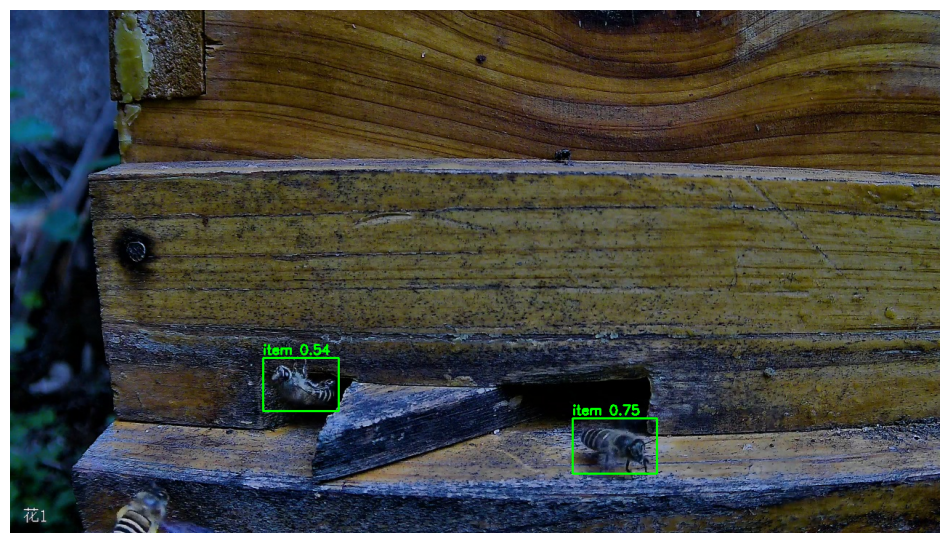

In [37]:
infer_one("/workspace/yolov11bee/experiments/inference/sample-images/custom-56-003032.jpg")


image 1/1 /workspace/yolov11bee/experiments/inference/sample-images/custom-62-000185.jpg: 480x800 (no detections), 12.9ms
Speed: 2.7ms preprocess, 12.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)


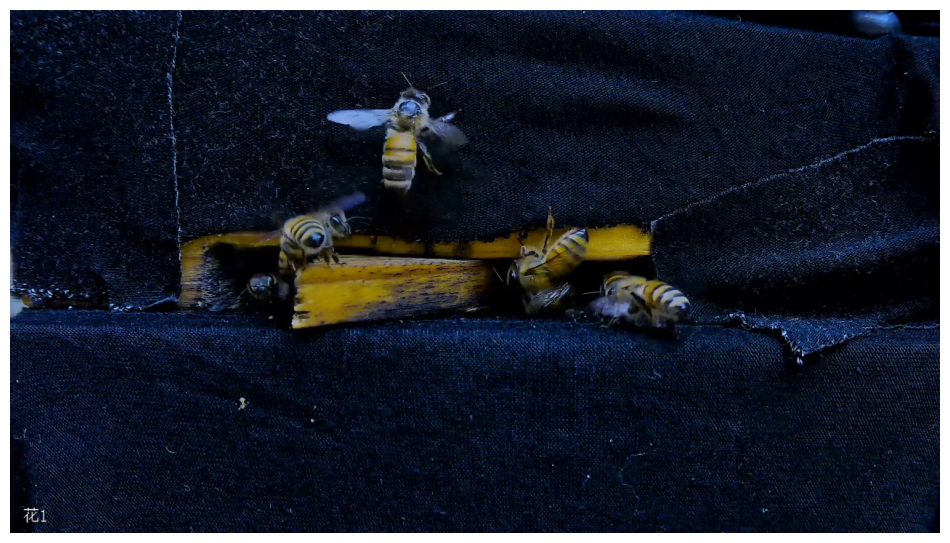

In [38]:
infer_one("/workspace/yolov11bee/experiments/inference/sample-images/custom-62-000185.jpg")


image 1/1 /workspace/yolov11bee/experiments/inference/sample-images/20250801114628_4 (1).jpg: 480x800 1 item, 13.1ms
Speed: 3.0ms preprocess, 13.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


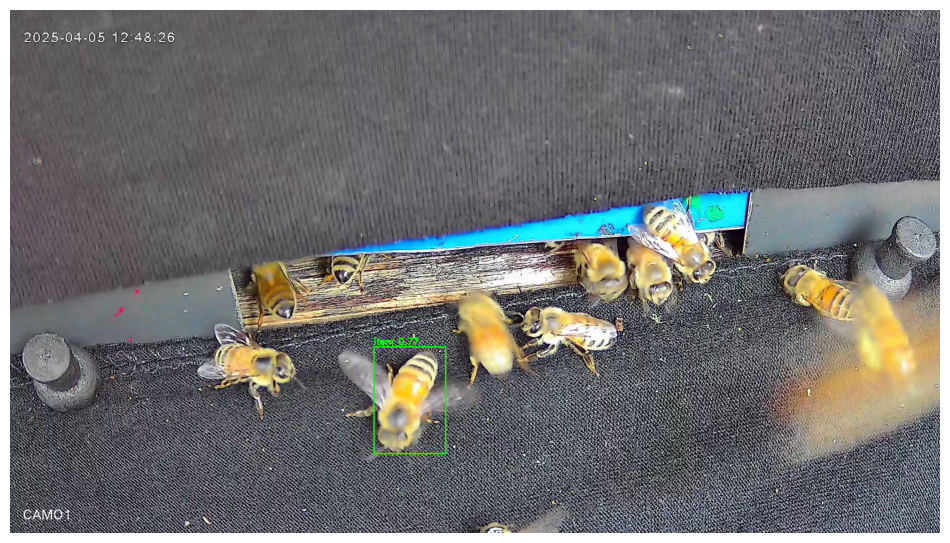

In [39]:
infer_one("/workspace/yolov11bee/experiments/inference/sample-images/20250801114628_4 (1).jpg")


image 1/1 /workspace/yolov11bee/experiments/inference/sample-images/20250801114628_4 (2).jpg: 480x800 7 items, 13.1ms
Speed: 3.0ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


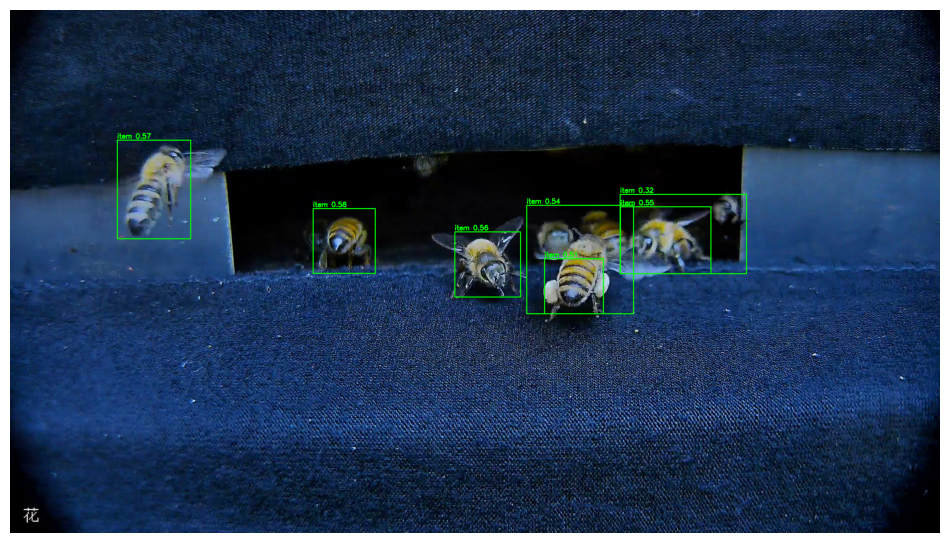

In [40]:
infer_one("/workspace/yolov11bee/experiments/inference/sample-images/20250801114628_4 (2).jpg")


image 1/1 /workspace/yolov11bee/experiments/inference/sample-images/20250801114628_4 (3).jpg: 480x800 1 item, 13.2ms
Speed: 3.0ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


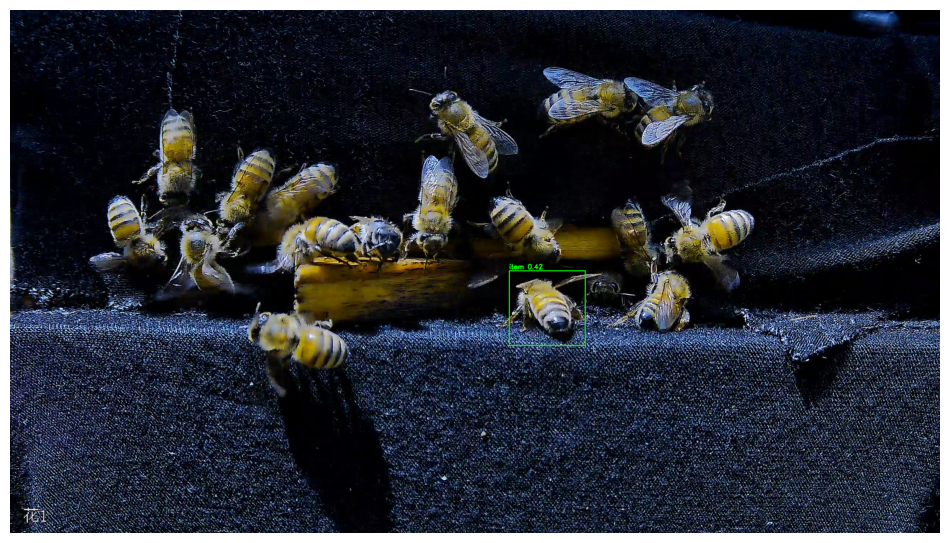

In [41]:
infer_one("/workspace/yolov11bee/experiments/inference/sample-images/20250801114628_4 (3).jpg")